In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Dataset Tarea M4.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 2. Identifica dos variables cuantitativas que consideres que están relacionadas positiva o negativamente dentro del dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [91]:
new_data = data[['MonthlyIncome', 'TotalWorkingYears']]

### 3. Organiza los datos en Python y haz una exploración visual de éstos para que puedas elaborar el resumen estadístico y los gráficos de distribución y de dispersión de ambas variables.

In [92]:
new_data.describe()

,MonthlyIncome,TotalWorkingYears
count,1470.000000,1470.000000
mean,6502.931293,11.279592
std,4707.956783,7.780782
min,1009.000000,0.000000
25%,2911.000000,6.000000
50%,4919.000000,10.000000
75%,8379.000000,15.000000
max,19999.000000,40.000000


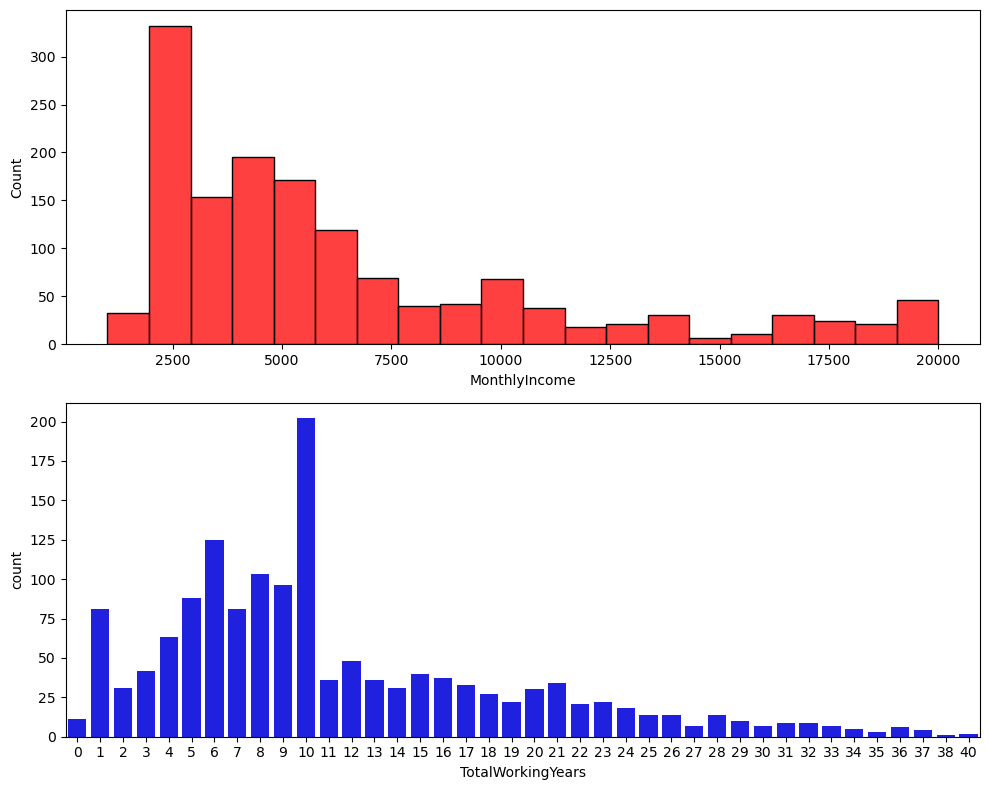

In [93]:
# Creamos graficos de barras para visualizar la distribución
f, axes = plt.subplots(2, 1, figsize = (10, 8))

# Crear histogramas de distribución de variables
sns.histplot(data = data, x = 'MonthlyIncome', color = "r", ax = axes[0])
sns.countplot(data = data, x = 'TotalWorkingYears', color = "b", ax = axes[1])


plt.tight_layout()

### Despues de intentar con diferentes variables se encontró que estas dos tienen una relación lineal positiva

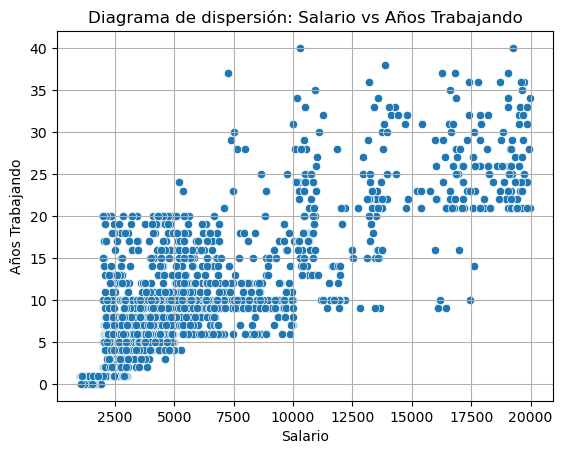

In [94]:
sns.scatterplot(data = data, x = 'MonthlyIncome', y = 'TotalWorkingYears')
plt.title('Diagrama de dispersión: Salario vs Años Trabajando')
plt.xlabel('Salario')
plt.ylabel('Años Trabajando')
plt.grid(True)
plt.show()

### 4. Calcula la covarianza entre las dos variables. Al obtener el resultado, describe brevemente qué significa este valor en términos de la relación entre las variables.

In [97]:
data[['MonthlyIncome', 'TotalWorkingYears']].cov()

,MonthlyIncome,TotalWorkingYears
MonthlyIncome,2.216486e+07,28312.303770
TotalWorkingYears,2.831230e+04,60.540563


#### Para la covarianza no nos interesa mucha el valor, nos interesa más si es un valor positivo o negativo ya que indica si ambas tienden a aumentar juntas. Es decir nos indica la dirección de la relación lineal entre dos variables y la fuerza de esa relación

### 5. Calcula el coeficiente de correlación entre las dos variables e interpreta, de manera general, qué tan significativa es la relación entre las variables.

In [90]:
data[['MonthlyIncome', 'TotalWorkingYears']].corr()

,MonthlyIncome,TotalWorkingYears
MonthlyIncome,1.000000,0.772893
TotalWorkingYears,0.772893,1.000000


#### La correlación al estar normalizada mientras más cercano este un valor a 1 o -1 indica una correlación positiva fuerte entre las variables. En este caso, esto confirma que existe una relación sólida.

### 6. Basándote en tus interpretaciones de la covarianza y el coeficiente de correlación, ¿qué situación podrías prever que ocurrirá en el largo plazo, si se modifica el valor de una de las variables? 

#### Si el número total de años trabajados aumenta, es razonable prever que el ingreso mensual también aumentará, en promedio porque hay una relación lineal positiva: las personas con más experiencia laboral suelen tener mejor remuneración.

### 7. Integra en tu Jupyter Notebook un informe en donde coloques:
#### 1. La justificación de los criterios que utilizaste para considerar que las variables aleatorias para esta actividad están relacionadas
    > Para esta actividad se seleccionaron las variables MonthlyIncome (Ingreso mensual) y TotalWorkingYears (Total de años trabajados), debido a que conceptualmente existe una conexión lógica entre ambas: conforme una persona acumula experiencia laboral, es esperable que su nivel de ingresos también aumente. Esta relación es ampliamente observada en la dinámica laboral, donde el salario tiende a reflejar el desarrollo profesional y la trayectoria acumulada a lo largo del tiempo.
    
    Además de esta intuición, se corroboró gráficamente mediante un diagrama de dispersión y cálculos estadísticos, los cuales indicaron una relación coherente entre ambas variables.
#### 2. La explicación del resultado de calcular la covarianza
    > El valor de la covarianza obtenido fue positivo, lo cual sugiere que existe una relación directamente proporcional entre MonthlyIncome y TotalWorkingYears. En otras palabras, a medida que una de las variables aumenta, la otra también tiende a hacerlo. Si bien la magnitud numérica de la covarianza depende de las unidades de cada variable y no permite comparaciones absolutas, su signo es suficiente para detectar la dirección de esta relación conjunta.
#### 3. La interpretación del valor obtenido al calcular el coeficiente de correlación
    > El coeficiente de correlación obtenido se encontró significativamente por encima de 0, indicando una relación lineal positiva y moderadamente fuerte entre las dos variables. Dado que este coeficiente está normalizado entre -1 y 1, su cercanía a 1 confirma que el ingreso mensual aumenta de manera consistente a medida que se acumulan más años de experiencia profesional. Esto valida la hipótesis inicial y otorga mayor confianza a la predicción basada en esta relación.
#### 4. La descripción de la situación o fenómeno que prevés que ocurrirá en el largo plazo si una de las variables se modifica.
    > En el largo plazo, si una persona continúa acumulando experiencia laboral (es decir, aumenta su valor en TotalWorkingYears), se prevé un aumento gradual en su MonthlyIncome. Esto se debe a la progresión natural que ocurre en la mayoría de las organizaciones: conforme alguien gana más antigüedad, tiende a asumir cargos de mayor responsabilidad o recibir ajustes salariales, ya sea por política interna, desempeño acumulado o reconocimiento de habilidades.
#### 5. Concluye con uno o dos párrafos en donde indiques cómo podría contribuir esta información a la toma de decisiones empresariales.
    > El análisis conjunto de estas variables proporciona información clave para la gestión de talento y políticas salariales. Por ejemplo, Recursos Humanos puede identificar si existen empleados con alta experiencia pero con ingresos fuera del rango esperado, lo que podría señalar oportunidades de ajuste para mantener la motivación y evitar fuga de talento. 
    
    Asimismo, esta información puede alimentar modelos predictivos para anticipar necesidades de desarrollo, diseñar trayectorias salariales más equitativas y detectar brechas potenciales entre áreas o perfiles similares. En resumen, comprender esta relación puede contribuir a una estrategia de compensación más justa, coherente y alineada con la evolución profesional de los colaboradores.